# Assignment 2

## Import libraries 

In [56]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

from sklearn import datasets
from sklearn.cluster import KMeans, DBSCAN
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.metrics import accuracy_score, silhouette_samples
from sklearn.preprocessing import StandardScaler
from sklearn import metrics

#import plotly.graph_objs as go
#import plotly.plotly as py



In [36]:
data = pd.read_csv('Wine.csv')
data.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline,Customer_Segment
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065,1
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050,1
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185,1
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480,1
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735,1


## Describe Data

In [37]:
data.isna().sum() 

Alcohol                 0
Malic_Acid              0
Ash                     0
Ash_Alcanity            0
Magnesium               0
Total_Phenols           0
Flavanoids              0
Nonflavanoid_Phenols    0
Proanthocyanins         0
Color_Intensity         0
Hue                     0
OD280                   0
Proline                 0
Customer_Segment        0
dtype: int64

In [38]:
df=data.iloc[:, 0:13]

In [39]:
df.head()

,Alcohol,Malic_Acid,Ash,Ash_Alcanity,Magnesium,Total_Phenols,Flavanoids,Nonflavanoid_Phenols,Proanthocyanins,Color_Intensity,Hue,OD280,Proline
0,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [41]:
df=StandardScaler().fit_transform(df)
df

array([[ 1.51861254, -0.5622498 ,  0.23205254, ...,  0.36217728,
         1.84791957,  1.01300893],
       [ 0.24628963, -0.49941338, -0.82799632, ...,  0.40605066,
         1.1134493 ,  0.96524152],
       [ 0.19687903,  0.02123125,  1.10933436, ...,  0.31830389,
         0.78858745,  1.39514818],
       ...,
       [ 0.33275817,  1.74474449, -0.38935541, ..., -1.61212515,
        -1.48544548,  0.28057537],
       [ 0.20923168,  0.22769377,  0.01273209, ..., -1.56825176,
        -1.40069891,  0.29649784],
       [ 1.39508604,  1.58316512,  1.36520822, ..., -1.52437837,
        -1.42894777, -0.59516041]])

## K means clustering 

### trying any number of clustering n=3 untile we found the optimal one 

In [42]:
k_clf = KMeans(n_clusters = 3, random_state = 0)
k_clf.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [44]:
k_clf.labels_

array([2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0])

## Elbow Method to  determine the best K 

In [45]:
sunSquareError = []
list_ks = list(range(1, 20))

for k in list_ks:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sunSquareError.append(km.inertia_)


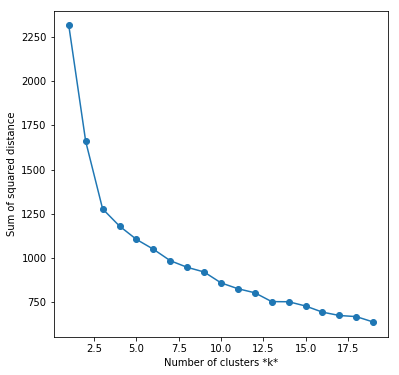

In [46]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_ks, sunSquareError, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

In [47]:
sunSquareError = []
list_ks = list(range(1, 10))

for k in list_ks:
    km = KMeans(n_clusters=k)
    km.fit(df)
    sunSquareError.append(km.inertia_)

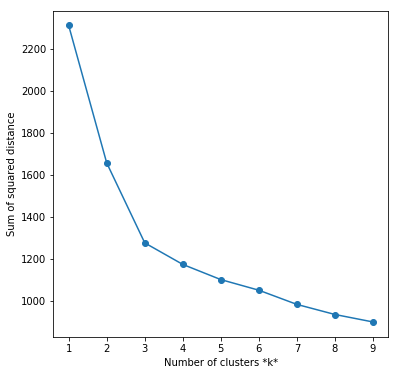

In [48]:
# Plot sse against k
plt.figure(figsize=(6, 6))
plt.plot(list_ks, sunSquareError, '-o')
plt.xlabel(r'Number of clusters *k*')
plt.ylabel('Sum of squared distance');

## From graph it show that the best ks are in range(2,3,4,5) 

In [49]:
k_clf = KMeans(n_clusters = 4, random_state = 0)
k_clf.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=0, tol=0.0001, verbose=0)

In [50]:
k_clf.labels_

array([0, 0, 0, 0, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 2, 2, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 3, 3, 3, 3, 2, 3, 2,
       2, 3, 3, 2, 3, 2, 3, 2, 2, 3, 3, 3, 2, 2, 3, 2, 3, 1, 2, 3, 3, 3,
       3, 3, 3, 3, 3, 2, 2, 2, 2, 3, 2, 2, 3, 3, 2, 3, 3, 3, 3, 3, 3, 2,
       2, 3, 3, 3, 3, 3, 3, 3, 3, 3, 2, 2, 2, 2, 2, 3, 2, 3, 3, 3, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1])

## DBSCAN clustering algorithm 

In [60]:
dbScan = DBSCAN(eps = 3, min_samples = 5).fit(df)

In [61]:
core_samples_mask = np.zeros_like(dbScan.labels_, dtype=bool)
core_samples_mask[dbScan.core_sample_indices_] = True
labels = dbScan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df, labels))

Estimated number of clusters: 1
Silhouette Coefficient: 0.218


In [62]:
dbScan.labels_

array([ 0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0, -1,  0,  0,  0, -1,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0, -1,  0,  0, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0, -1, -1,  0,  0,  0,  0,  0,  0,  0,  0,  0,  0,
        0,  0,  0,  0,  0,  0,  0,  0], dtype=int64)

In [64]:
dbScan = DBSCAN(eps = 3, min_samples = 20).fit(df)

core_samples_mask = np.zeros_like(dbScan.labels_, dtype=bool)
core_samples_mask[dbScan.core_sample_indices_] = True
labels = dbScan.labels_

# Number of clusters in labels, ignoring noise if present.
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)

print('Estimated number of clusters: %d' % n_clusters_)
print("Silhouette Coefficient: %0.3f"
      % metrics.silhouette_score(df, labels))

Estimated number of clusters: 1
Silhouette Coefficient: 0.179


In [ ]:
def matplotlib_to_plotly(cmap, pl_entries):
    h = 1.0/(pl_entries-1)
    pl_colorscale = []
    
    for k in range(pl_entries):
        C = map(np.uint8, np.array(cmap(k*h)[:3])*255)
        pl_colorscale.append([k*h, 'rgb'+str((C[0], C[1], C[2]))])
        
    return pl_colorscale

unique_labels = set(labels)

data = []

for k in unique_labels:
    class_member_mask = (labels == k)
   
    xy = X[class_member_mask & core_samples_mask]
    trace1 = go.Scatter(x=xy[:, 0], y=xy[:, 1], mode='markers', 
                        marker=dict(size=14,
                                    line=dict(color='black', width=1)))

    xy = X[class_member_mask & ~core_samples_mask]
    trace2 = go.Scatter(x=xy[:, 0], y=xy[:, 1], mode='markers', 
                        marker=dict(size=14,
                                    line=dict(color='black', width=1)))
    data.append(trace1)
    data.append(trace2)

layout = go.Layout(showlegend=False,
                   title='Estimated number of clusters: %d' % n_clusters_,
                   xaxis=dict(showgrid=False, zeroline=False),
                   yaxis=dict(showgrid=False, zeroline=False))
fig = go.Figure(data=data, layout=layout)

py.iplot(fig)